<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
import python_files.ValidationOperations as valop


In [18]:
dataframe = pd.read_csv('./datasets/dataframe0.csv', low_memory = False)

In [19]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Location', 'Tournament', 'Series',
       'Court', 'Round', 'Best of', 'RankFilledA', 'RankFilledB',
       'PtsFilledA', 'PtsFilledB', 'MaxFilledA', 'MaxFilledB',
       'AvgFilledA', 'AvgFilledB', 'Carpet', 'Clay', 'Grass', 'Hard',
       'FEDERER R.A', 'FEDERER R.B', 'NADAL R.A', 'NADAL R.B',
       'DJOKOVIC N.A', 'DJOKOVIC N.B', 'MURRAY A.A', 'MURRAY A.B',
       'RODDICK A.A', 'RODDICK A.B', 'FERRER D.A', 'FERRER D.B',
       'BERDYCH T.A', 'BERDYCH T.B', 'HEWITT L.A', 'HEWITT L.B',
       'DEL POTRO J. M.A', 'DEL POTRO J. M.B', 'TSONGA J.W.A',
       'TSONGA J.W.B', 'CILIC M.A', 'CILIC M.B', 'WAWRINKA S.A',
       'WAWRINKA S.B', 'GASQUET R.A', 'GASQUET R.B', 'NISHIKORI K.A',
       'NISHIKORI K.B', 'MONFILS G.A', 'MONFILS G.B', 'FERRERO J.C.A',
       'FERRERO J.C.B', 'ROBREDO T.A', 'ROBREDO T.B', 'NALBANDIAN D.A',
       'NALBANDIAN D.B', 'RAONIC M.A', 'RAONIC M.B', 'AGASSI A.A',
       'AGASSI A.B', 'HAAS T.A', 'HAAS T.B', 'ISNER J.A', 'ISNER

In [20]:
dataframe.head(10)

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,RetiredLastA,RetiredLastB,PlayedA>PlayedB,WonRatioA>WonRatioB,PlayedCourtA>PlayedCourtB,WonRatioCourtA>WonRatioCourtB,5_gamesMeanA>5_gamesMeanB,5_setsMeanA>5_setsMeanB,PlayedVsSameHandedA>PlayedVsSameHandedB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1.0,46,0,0,1,0,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

KeyboardInterrupt: 

In [5]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

NameError: name 'best_dataframe_split_index' is not defined

Best Max Depth: 5 - Accuracy: 0.6617080854042702
Best Max Features: 36 - Accuracy: 0.6627581379068953
Wall time: 20.6 s


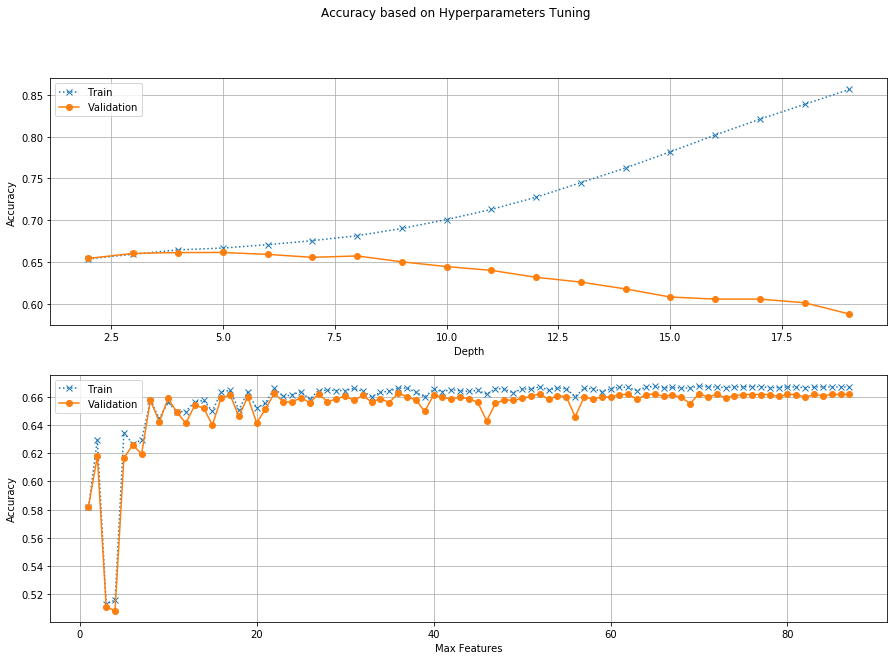

In [21]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                                             max_features = tree_best_features['max_features']))

# IL BIAS e LA VARIANZA SONO PIUTTOSTO BASSI PER L'ALBERO CHE ABBIAMO COSTRUITO

In [ ]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    BaggingClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=bagged_tree_best_n_estimators, n_jobs = -1), n_tests = 3)

#IL BAGGING RIDUCE UN PO' LA VARIANZA, MA PARE AUMENTARE IL BIAS

In [ ]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

In [ ]:
%%time
from sklearn.ensemble import AdaBoostClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    AdaBoostClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=boosted_tree_best_n_estimators), n_tests = 10)

# LA BIAS RIMANE PIù O MENO INVARIATA, IL TUNING DEGLI IPERPARAMETRI E' STATO EFFICIENTE

Best Estimators Number 300 - Accuracy: 0.6674250379185626
Best Depth 7 - Accuracy: 0.6941430404853576
Wall time: 2min 51s


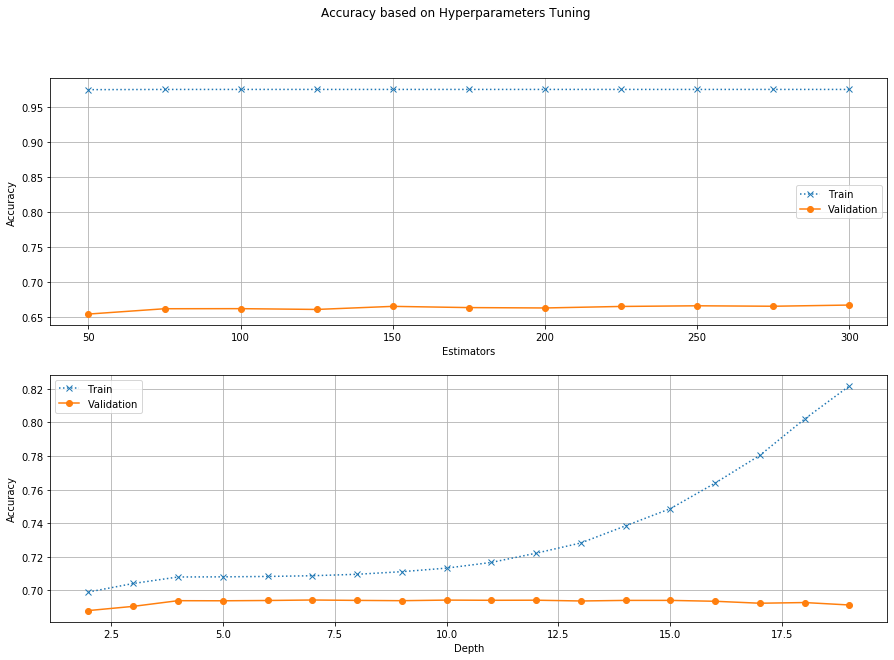

In [5]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)

#Miglioramento dell'accuratezza! Con l'aumento della depth, foresta più fully grown migliora l'accuratezza al contrario di quanto accadeva
#all'inizio!

In [ ]:
%%time
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                           RandomForestClassifier(n_estimators = forest_best_features['n_estimators']),
                                                                  n_tests = 3)

# LA BIAS CRESCE DI POCO, FORSE QUESTO PORTA AD UN PEGGIORAMENTO DELL'ACCURATEZZA

In [ ]:
%%time
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                                 RandomForestClassifier(n_estimators = forest_best_features['n_estimators'],
                                                                 max_depth = forest_best_features['max_depth']),
                                                                  n_tests = 3)

# LA FORESTA COL TUNING DEI PARAMETRI PORTA AD UN RISULTATO SIMILE RISPETTO ALL'ALBERO, PROBABILMENTE PERCHé LA BIAS CRESCE UN PO'
# MENTRE LA VARIANZA DIMINUISCE

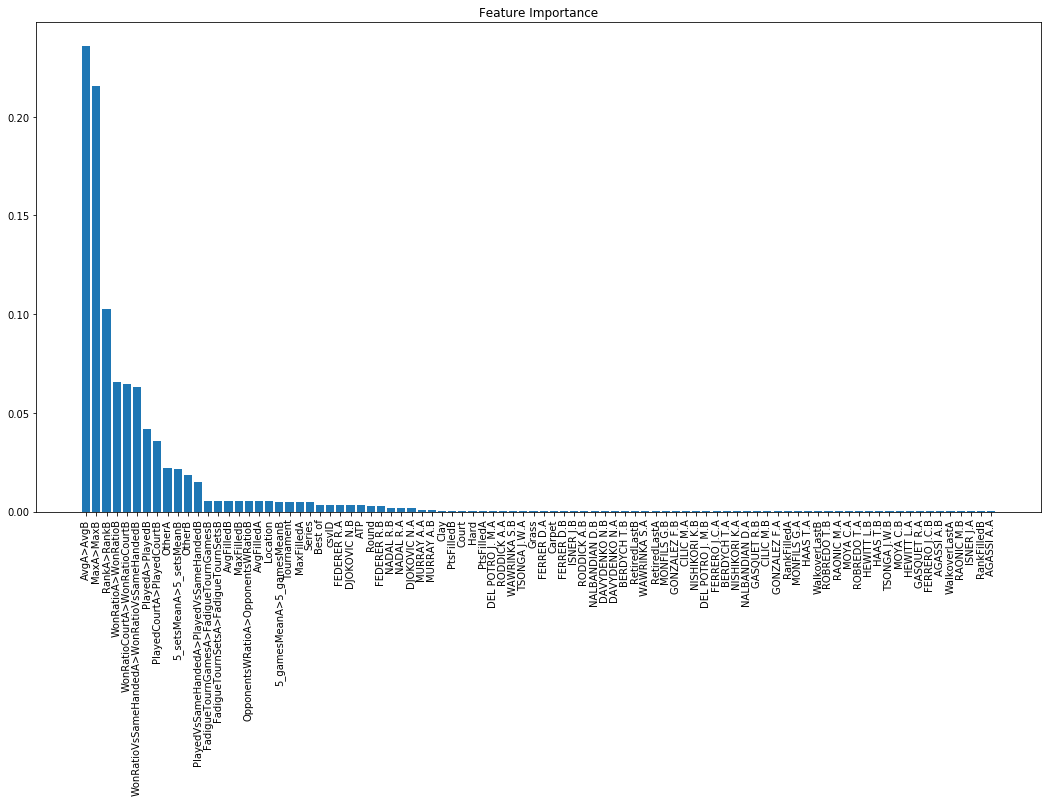

Wall time: 9.99 s


In [10]:
%%time

import matplotlib.pyplot as plt

x = dataframe.loc[:, dataframe.columns != 'Winner']
y = dataframe['Winner']

rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

rf.fit(x,y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [x.columns[i] for i in indices]

plt.figure(figsize=(18,9))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), features, rotation=90)
plt.show()

In [11]:
%%time
from sklearn.feature_selection import RFE

#df = df.head(1000)



selector = RFE(rf, step=5, n_features_to_select=None)

selector.fit(x,y)
selector.support_

Wall time: 1min 20s


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
features = x.columns.values[selector.support_]

features = np.append(features,['Winner'])

print('Selected features (total:', dataframe.shape[1], ')-> ', len(features))
print(features)

Selected features (total: 91 )->  46
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PtsFilledA' 'PtsFilledB' 'MaxFilledA' 'MaxFilledB' 'AvgFilledA'
 'AvgFilledB' 'Clay' 'Grass' 'Hard' 'FEDERER R.A' 'FEDERER R.B'
 'NADAL R.A' 'NADAL R.B' 'DJOKOVIC N.A' 'DJOKOVIC N.B' 'MURRAY A.A'
 'MURRAY A.B' 'DEL POTRO J. M.A' 'NALBANDIAN D.B' 'ISNER J.B' 'OtherA'
 'OtherB' 'RankA>RankB' 'MaxA>MaxB' 'AvgA>AvgB'
 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'RetiredLastB' 'PlayedA>PlayedB'
 'WonRatioA>WonRatioB' 'PlayedCourtA>PlayedCourtB'
 'WonRatioCourtA>WonRatioCourtB' '5_gamesMeanA>5_gamesMeanB'
 '5_setsMeanA>5_setsMeanB' 'PlayedVsSameHandedA>PlayedVsSameHandedB'
 'WonRatioVsSameHandedA>WonRatioVsSameHandedB' 'Winner']


Best Estimators Number 200 - Accuracy: 0.6629331466573328
Best Depth 11 - Accuracy: 0.6943180492357951
Wall time: 1min 50s


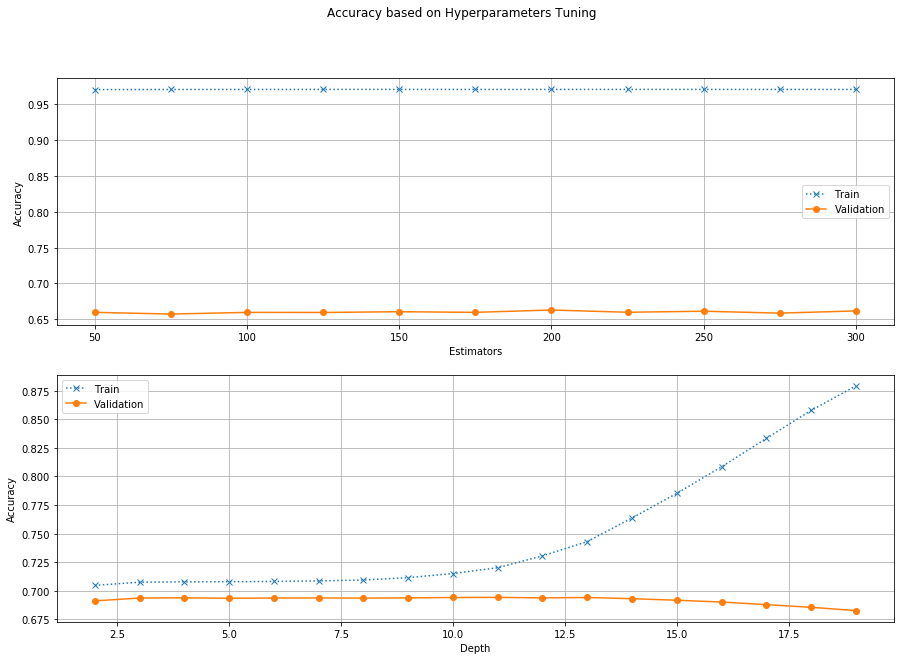

In [13]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

In [ ]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

In [ ]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))